In [1]:
## first line of code is to clear R's memory
rm(list=ls())

In [2]:
#libraries
library(Signac)
library(Seurat)
library(rtracklayer)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(qs)
library(SeuratWrappers)
library(ggplot2)
library(patchwork)
library(JASPAR2020)
library(TFBSTools)
library(BSgenome.Hsapiens.UCSC.hg38)




The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Loading required package: SeuratObject

Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.1”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Loading required package: GenomicRange

In [3]:
#####################
#Read processed Seurat Object
###################
seurat_object = qread("complete/GSE184462_merged_1_10_Motif.rds")

In [4]:
Idents(seurat_object)  <- seurat_object$cell.type

In [5]:
unique(Idents(seurat_object))

[1] Mesothelial Cell                       
 [2] Fibroblast (General)                   
 [3] Pericyte (General) 3                   
 [4] Pericyte (General) 1                   
 [5] Endothelial Cell (General) 1           
 [6] Endothelial Cell (General) 2           
 [7] Adipocyte                              
 [8] Lymphatic Endothelial Cell             
 [9] Macrophage (General)                   
[10] Pericyte (General) 2                   
[11] Pericyte (Esophageal Muscularis)       
[12] Macrophage (General,Alveolar)          
[13] T Lymphocyte 1 (CD8+)                  
[14] Vascular Smooth Muscle 2               
[15] Cardiac Pericyte 4                     
[16] Endothelial Cell (General) 3           
[17] Vascular Smooth Muscle 1               
[18] Cardiac Pericyte 3                     
[19] Naive T cell                           
[20] Schwann Cell (General)                 
[21] Pericyte (General) 4                   
[22] Cardiac Pericyte 2                     
[23] Plasma Cell                            
[24] Alverolar Type 2,Immune                
[25] Endothelial Cell (Myocardial)          
[26] Mast Cell                              
[27] Fibroblast (Peripheral Nerve)          
[28] Cardiac Fibroblasts                    
[29] Fibroblast (Epithelial)                
[30] Peripheral Nerve Stromal               
[31] Luteal Cell (Ovarian)                  
[32] Small Intestinal Enterocyte            
[33] Smooth Muscle (General)                
[34] Smooth Muscle (Esophageal Muscularis) 3
[35] Chief Cell                             
[36] Natural Killer T Cell                  
[37] T lymphocyte 2 (CD4+)                  
[38] Foveolar Cell                          
[39] Pancreatic Acinar Cell                 
[40] Alveolar Capillary Endothelial Cell    
[41] Ductal Cell (Pancreatic)               
[42] Memory B Cell                          
[43] Transitional Zone Cortical Cell        
[44] Cortical Epithelial-like               
[45] Zona Fasciculata Cortical Cell         
[46] Zona Glomerulosa Cortical Cell         
[47] Endothelial (Exocrine Tissues)         
[48] Fibroblast (Liver Adrenal)             
[49] CNS,Enteric Neuron                     
[50] Smooth Muscle (Vaginal)                
[51] Endocardial Cell                       
[52] Cardiac Pericyte 1                     
[53] Alveolar Type 2 (AT2) Cell             
[54] Keratinocyte 1                         
[55] Smooth Muscle (GE Junction)            
55 Levels: Mesothelial Cell Fibroblast (General) ... Smooth Muscle (GE Junction)

Selecting background regions to match input sequence characteristics

Matching GC.percent distribution

Testing motif enrichment in 874 regions

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ggseqlogo package.
  Please report the issue at <https://github.com/omarwagih/ggseqlogo/issues>."


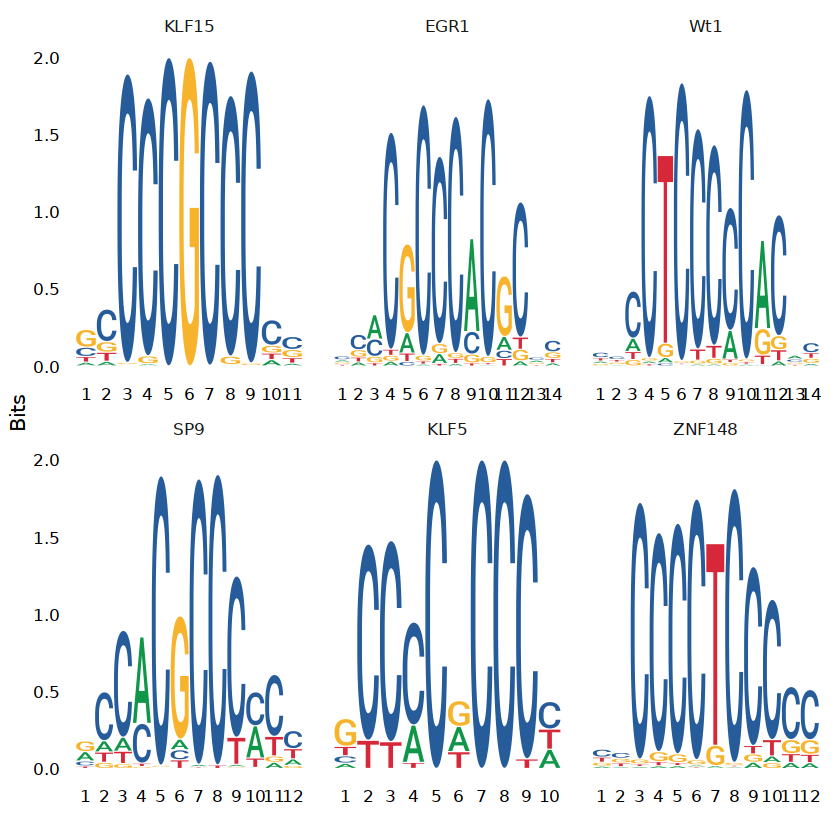

In [6]:
#find markers
DefaultAssay(seurat_object) <- "peaks"

da_peaks <- FindMarkers(
  object = seurat_object,
  ident.1 = "Mesothelial Cell",
  ident.2 = "Endothelial Cell (General) 1", 
  only.pos = TRUE,
  test.use = 'LR',
  min.pct = 0.05,
  latent.vars = 'nCount_peaks'
)

# get top differentially accessible peaks
top.da.peak <- rownames(da_peaks[da_peaks$p_val < 0.005, ])

enriched.motifs <- FindMotifs(
  object = seurat_object,
  features = top.da.peak,
)

MotifPlot(
  object = seurat_object,
  motifs = head(rownames(enriched.motifs))
)

In [7]:
enriched.motifs

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
MA1513.1,MA1513.1,603,7626,68.99314,19.0650,3.618837,4.708739e-233,KLF15,3.512719e-230
MA0162.4,MA0162.4,579,7376,66.24714,18.4400,3.592578,2.699864e-217,EGR1,1.007049e-214
MA1627.1,MA1627.1,663,10574,75.85812,26.4350,2.869609,5.644312e-209,Wt1,1.403552e-206
MA1564.1,MA1564.1,592,8218,67.73455,20.5450,3.296888,2.091449e-204,SP9,3.900552e-202
MA0599.1,MA0599.1,704,12635,80.54920,31.5875,2.550034,3.179188e-200,KLF5,4.743349e-198
MA1653.1,MA1653.1,699,12445,79.97712,31.1125,2.570578,1.342160e-199,ZNF148,1.668752e-197
MA0471.2,MA0471.2,576,8105,65.90389,20.2625,3.252505,7.941741e-193,E2F6,8.463627e-191
MA0039.4,MA0039.4,691,12836,79.06178,32.0900,2.463751,1.531578e-183,KLF4,1.428197e-181
MA0732.1,MA0732.1,450,4875,51.48741,12.1875,4.224608,8.273034e-181,EGR3,6.857426e-179


In [8]:
# gather the footprinting information for sets of motifs
DefaultAssay(seurat_object) <- "peaks"
seurat_object <- Footprint(
  object = seurat_object,
  motif.name = c("CEBPG"), #, "Wt1", "KLF5"),
  genome = BSgenome.Hsapiens.UCSC.hg38
)



Computing Tn5 insertion bias

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Computing observed Tn5 insertions per base

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_GL383518v1_alt, chr1_GL383519v1_alt, chr1_GL383520v2_alt, chr1_KI270759v1_alt, chr1_KI270760v1_alt, chr1_KI270761v1_alt, chr1_KI270762v1_alt, chr1_KI270763v1_alt, chr1_KI270764v1_alt, chr1_KI270765v1_alt, chr1_KI270766v1_alt, chr1_KI270892v1_alt, chr2_GL383521v1_alt, chr2_GL383522v1_alt, chr2_GL582966v2_alt, chr2_KI270767v1_alt, chr2_KI270768v1_alt, chr2_KI270769v1_alt, chr2_KI270770v1_alt, chr2_KI27077

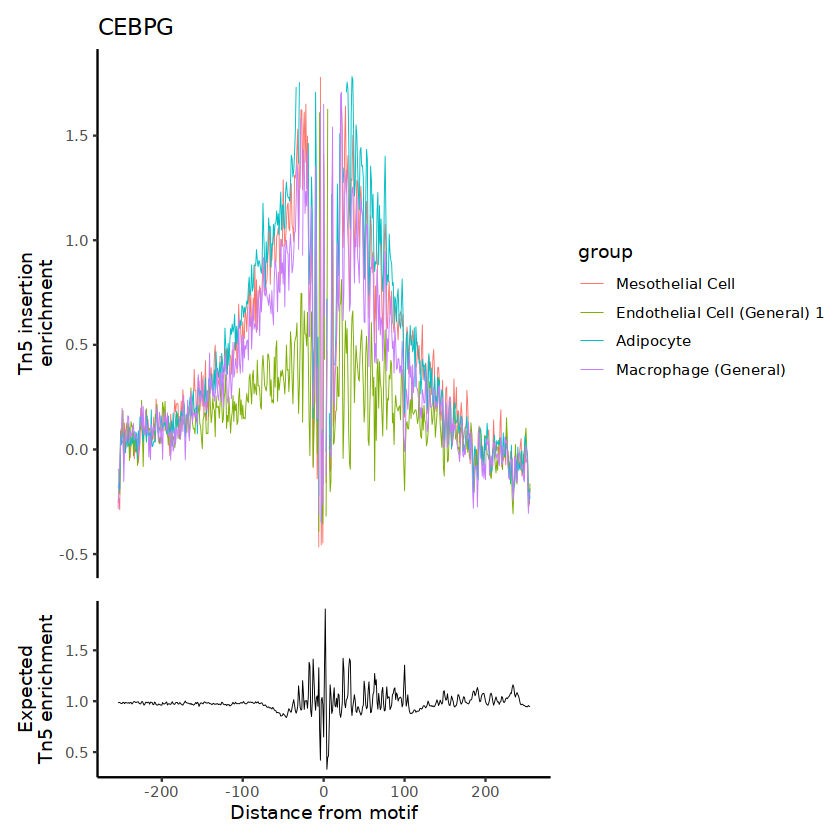

In [9]:
# plot the footprint data for each group of cells
p3 <- PlotFootprint(seurat_object, features = c("CEBPG"), label = FALSE,
                    idents = c("Mesothelial Cell", "Endothelial Cell (General) 1", "Macrophage (General)", "Adipocyte"))
p4 <- p3+ patchwork::plot_layout(ncol = 1)
p4

In [14]:
if (FALSE){
ggsave(p4, 
       filename = "exports/footprint_plot.pdf",
       device = "pdf",
       height = 6, width = 15, units = "in") 

}